# Applications in the Financial Area

The financial market is the grandfather of all **time series** data. If you pay for proprietary high-tech stock exchange trading data, you could receive terabyte-sized data avalanches that can take days to process, even if you have ultra-high computing performance and access to embarrassingly parallel processing.

On the one hand, we have high-frequency trading (HFT) technology, which is already among the newest and most famous members of the financial community and trades based on information and insights resulting from **time series** analysis at the market level. microseconds. And on the other side, we have traditional trading companies - which analyze long-term **time series** for hours, days or even months -, which continue to have success in the markets, showing that **time series analysis ** for financial data can be accomplished in a myriad of successful ways and on timescales spanning many orders of magnitude, from milliseconds to months.

We'll work through a classic example of **time series** analysis for fun and profit: predicting tomorrow's stock returns according to the S&P 500 index.

## Obtaining and Exploring Financial Data

It can be very difficult to obtain financial data if you are looking for a specific product or temporal resolution. In these cases, you need to purchase the data. But historical stock price data is available from a variety of services, including:

- Yahoo Finance. Although Yahoo has discontinued maintenance of its historical data API, daily historical data is available for download (https://perma.cc/RQ6D-U4JX);
- newer companies such as AlphaVantage (https://alphavantage.co/) and Quandl (https://quandl.com) offer a combination of real-time and historical price information for stock market data;

We restrict our analysis to daily stock price data freely available on Yahoo. We downloaded the data for the S&P 500 covering the dates from 1990 to 2019. In the following code, we see which columns are available in the dataset we downloaded and plot the daily closing price to start exploring our data:

<br>

<div class="alert alert-block alert-info">
<b>Note:</b> As previously mentioned about the difficulty in obtaining the data, we will only use stock data from the period from 07/17/2018 to 07/16/2019
</div>

In [25]:
# Standard libs
import os
import numpy as np
import pandas as pd

# Dataviz libs
import matplotlib.pyplot as plt

In [26]:
# Show current working directory
print(os.getcwd())

/Users/dellacorte/py-projects/data-science/time-series-pocket-reference/applications-field-of-finance


In [27]:
# Define the path to save the image
image_path = "/Users/dellacorte/py-projects/data-science/time-series-pocket-reference/applications-field-of-finance/images/"

In [2]:
df = pd.read_csv("/Users/dellacorte/py-projects/data-science/time-series-pocket-reference/datasets/sp500.csv", sep=";")

In [3]:
df.shape

(251, 7)

In [4]:
df.head()

,date,open,high,low,close,adj_close,volume
0,"Jul 16, 2019","3,012.13","3,015.02","3,001.15","3,004.04","3,004.04","1,742,567,428"
1,"Jul 15, 2019","3,017.80","3,017.80","3,008.77","3,014.30","3,014.30","2,874,970,000"
2,"Jul 12, 2019","3,003.36","3,013.92","3,001.87","3,013.77","3,013.77","2,974,960,000"
3,"Jul 11, 2019","2,999.62","3,002.33","2,988.80","2,999.91","2,999.91","3,154,620,000"
4,"Jul 10, 2019","2,989.30","3,002.98","2,984.62","2,993.07","2,993.07","3,154,240,000"


In [5]:
df.dtypes

date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object

In [6]:
# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"], format="%b %d, %Y")

# List of numeric columns
numeric_cols = ["open", "high", "low", "close", "adj_close", "volume"]

# Remove commas and convert to numeric
df[numeric_cols] = df[numeric_cols].replace(",", "", regex=True).apply(pd.to_numeric)

# Set date as index
df.set_index("date", inplace=True)

# Check the result
print(df.dtypes)

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object


In [7]:
print(df.isna().sum())

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


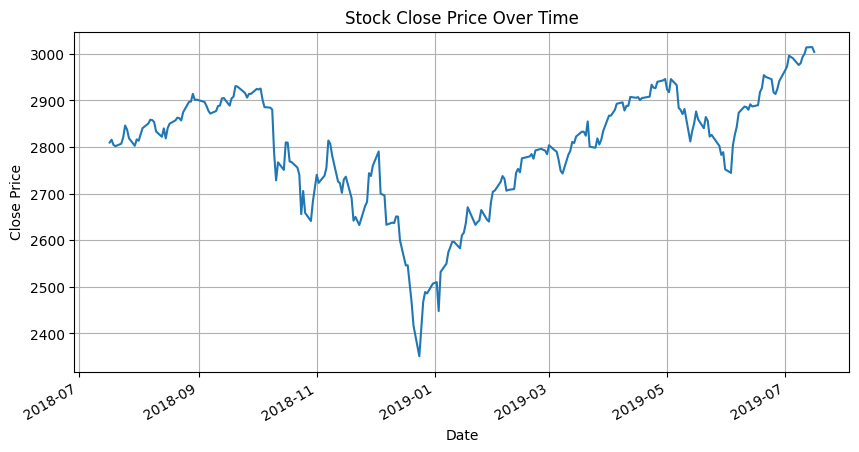

In [8]:
# Plot the close price
df["close"].plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Over Time")
plt.grid(True)
plt.show()

We can observe that the values ​​are different at the beginning and end of the date period covered by the dataset. We also note that there may be different “regimes”. For reasons clearly seen in the chart, financial analysts are eager to develop models that identify regime changes in stock prices. Apparently, there are different regimes, even if we don't have an exact definition of where another regime ends and another begins.

The potential for change points and different regimes indicates that it may be a good idea to split the data set into different subsets and data to be modeled separately. However, we want to keep the data together, as daily data does not generate many data points in some months; We will need to keep all the data we can. If we're only interested in forecasts for the next day, let's see if we can justify and keep that data together.

Let's see if data normalization can help with comparing data from different time periods. We will analyze the value of a week's closing price on a scale of three different months within the **time series**:

In [14]:
print(df.index)  # Ensure it's a DatetimeIndex
print(df.index.is_monotonic_increasing)  # Check if it's sorted

DatetimeIndex(['2019-07-16', '2019-07-15', '2019-07-12', '2019-07-11',
               '2019-07-10', '2019-07-09', '2019-07-08', '2019-07-05',
               '2019-07-03', '2019-07-02',
               ...
               '2018-07-30', '2018-07-27', '2018-07-26', '2018-07-25',
               '2018-07-24', '2018-07-23', '2018-07-20', '2018-07-19',
               '2018-07-18', '2018-07-17'],
              dtype='datetime64[ns]', name='date', length=251, freq=None)
False


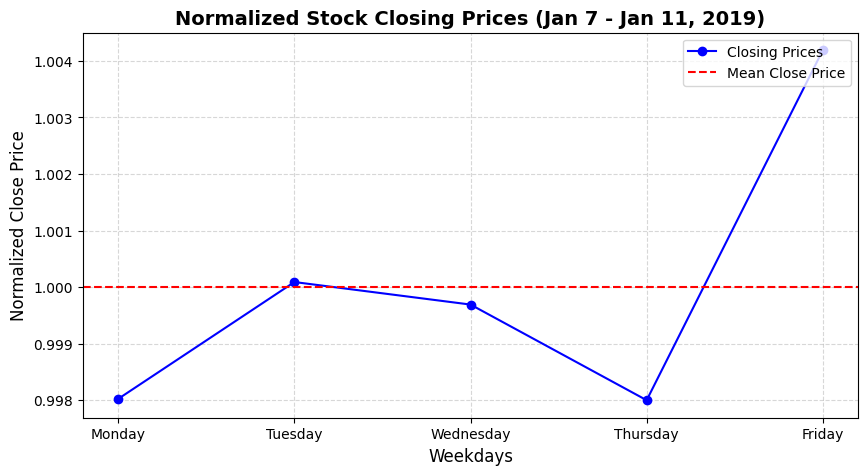

<Figure size 640x480 with 0 Axes>

In [28]:
# Sort index in ascending order
df = df.sort_index()

# Select a date range
vals     = df.loc['2018-08-20':'2018-08-24', "close"].values
mean_val = np.mean(vals)

# Plot the scaled closing prices
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot([1, 2, 3, 4, 5], vals / mean_val, marker='o', linestyle='-', color='blue', label="Closing Prices")

# Add title and labels
plt.title("Normalized Stock Closing Prices (Jan 7 - Jan 11, 2019)", fontsize=14, fontweight="bold")
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("Normalized Close Price", fontsize=12)

# Set custom x-axis labels
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize=10)

# Add a horizontal line for the mean
plt.axhline(1, linestyle="--", color="red", linewidth=1.5, label="Mean Close Price")

# Customize grid
plt.grid(True, linestyle="--", alpha=0.5)

# Add legend
plt.legend(loc="upper right", fontsize=10)

# Show the final plot
plt.show()

# Define full image path
image_filename = os.path.join(image_path, "normalized_stock_prices_august_2018.png")

# Save the plot as an image file (change format if needed)
plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as PNG (high resolution)


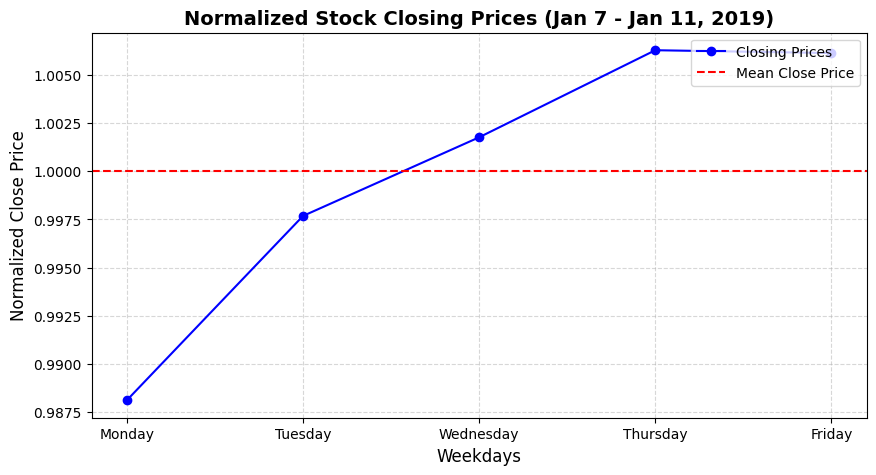

<Figure size 640x480 with 0 Axes>

In [29]:
# Sort index in ascending order
df = df.sort_index()

# Select a date range
vals = df.loc['2019-01-07':'2019-01-11', "close"].values
mean_val = np.mean(vals)

# Plot the scaled closing prices
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot([1, 2, 3, 4, 5], vals / mean_val, marker='o', linestyle='-', color='blue', label="Closing Prices")

# Add title and labels
plt.title("Normalized Stock Closing Prices (Jan 7 - Jan 11, 2019)", fontsize=14, fontweight="bold")
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("Normalized Close Price", fontsize=12)

# Set custom x-axis labels
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize=10)

# Add a horizontal line for the mean
plt.axhline(1, linestyle="--", color="red", linewidth=1.5, label="Mean Close Price")

# Customize grid
plt.grid(True, linestyle="--", alpha=0.5)

# Add legend
plt.legend(loc="upper right", fontsize=10)

# Show the final plot
plt.show()

# Define full image path
image_filename = os.path.join(image_path, "normalized_stock_prices_january_2019.png")

# Save the plot as an image file (change format if needed)
plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as PNG (high resolution)

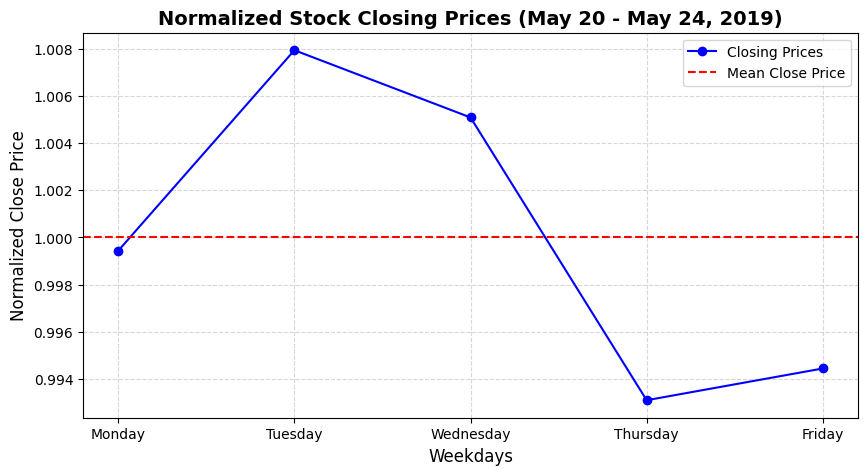

<Figure size 640x480 with 0 Axes>

In [30]:
# Sort index in ascending order
df = df.sort_index()

# Sort index in ascending order
df = df.sort_index()

# Select a date range
vals     = df.loc['2019-05-20':'2019-05-24', "close"].values
mean_val = np.mean(vals)

# Plot the scaled closing prices
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot([1, 2, 3, 4, 5], vals / mean_val, marker='o', linestyle='-', color='blue', label="Closing Prices")

# Add title and labels
plt.title("Normalized Stock Closing Prices (May 20 - May 24, 2019)", fontsize=14, fontweight="bold")
plt.xlabel("Weekdays", fontsize=12)
plt.ylabel("Normalized Close Price", fontsize=12)

# Set custom x-axis labels
plt.xticks([1, 2, 3, 4, 5], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize=10)

# Add a horizontal line for the mean
plt.axhline(1, linestyle="--", color="red", linewidth=1.5, label="Mean Close Price")

# Customize grid
plt.grid(True, linestyle="--", alpha=0.5)

# Add legend
plt.legend(loc="upper right", fontsize=10)

# Show the final plot
plt.show()

# Define full image path
image_filename = os.path.join(image_path, "normalized_stock_prices_may_2019.png")

# Save the plot as an image file (change format if needed)
plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as PNG (high resolution)

We plot the closing prices over three weeks in three different months, each scaled by the average for that week as per the code above. The relative percentage changes from day to day over the course of a week look about the same across months.

These charts are promising. Although the average values ​​and variance of closing prices have changed considerably over time, the graphs suggest similar behavior over time as we normalize the data to its average value in a given month.

Therefore, we will consider whether we can find a way to make all the full-time period data similar enough to meaningfully train it with a model. We want to know if there is a way to transform the data that is financially meaningful, but also makes the data comparable across a time period.

Now, we will calculate the daily return, that is, the change in the price from the beginning to the end of each day trade:

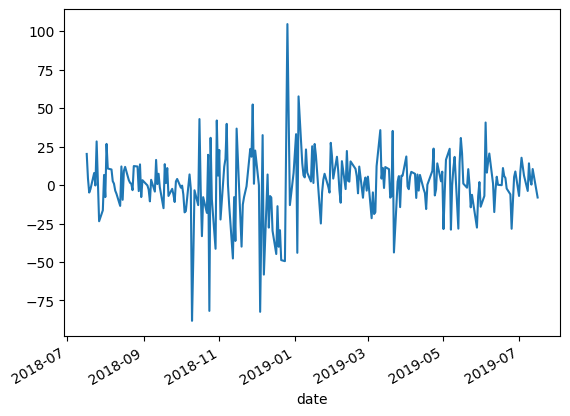

In [32]:
df['day_trade_return'] = df.close - df.open
df['day_trade_return'].plot()

# Define full image path
image_filename = os.path.join(image_path, "day_trade_return_plot.png")

# Save the plot as an image file (change format if needed)
plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as PNG (high resolution)

As we can see in the figure above, this alone is not enough for the data to be comparable. We will also have to find a way to normalize the data without a lookahead, so that the values ​​we are using for inputs and outputs in our model are more uniform over the time period of interest. We will see how to do this later.

---

##### Financial Markets as a Random Walk

The random walk is a good starting model for financial **time series**; Stock prices are often cited as the ultimate example of a naturally occurring random walk. Just remember two perspectives when we are analyzing our data. First, many regime shifts may just be an effect of the natural contours of a random walk. Second, because random walks are a natural fit for stock data, our null or most basic model, with which we can begin to compare more complicated models, would be one in which we predict tomorrow's price to be today's price, consistent with our understanding of the stock market as a random walk. In this case, we would expect a very high correlation.

On the other hand, if we differentiate the **time series** so that the value in each time interval represents the change in value of the **time series** from one time interval to another, the correlation would disappear, because any correlation would have been due to bias rather than actual predictive ability of such a simple model.

Therefore, in finance, whether you generate a model with high or low correlation can have a lot to do with the type of data you are modeling. If you model returns (which you should do) rather than stock prices (a common mistake even in the field), you will have correlations that appear low, but they are more likely to be predictive of the real world, rather than models that promise the world. and do not work in production. Therefore, we model returns instead of stock price in the next example.

---